# Insurance Cost Analysis Project


#### Introduction

For this project, we will be exploring a dataset containing information about insurance charges for individuals from [https://www.kaggle.com/datasets/mirichoi0218/insurance]. The dataset includes various factors that may influence insurance costs, such as age, sex, BMI, number of children, smoking status, and region.

Our goal is to analyze this data and create models that can help predict insurance charges based on these factors. This kind of analysis can be valuable for both insurance companies and individuals seeking to understand what influences their insurance costs.

The dataset we're using contains the following columns:
* age: Age of the primary beneficiary
* sex: Gender of the insurance contractor (female or male)
* bmi: Body mass index of the primary beneficiary
* children: Number of children covered by health insurance / Number of dependents
* smoker: Whether the primary beneficiary is a smoker (yes or no)
* region: The beneficiary's residential area in the US (northeast, southeast, southwest, northwest)
* charges: Individual medical costs billed by health insurance

By examining these factors, we aim to uncover patterns and relationships that affect insurance costs. This analysis could provide insights for insurance companies in risk assessment and pricing, as well as for individuals looking to understand or potentially reduce their insurance expenses.
Throughout this project, we will perform exploratory data analysis, visualize key relationships, and build predictive models to estimate insurance charges based on the provided features.

## Import Libraries

**Importing all the necessary libraries required for the project**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

In [6]:
# Load the dataset
data = pd.read_csv('insurance.csv')
df = data
# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


It can be observe from above output that there are 1338 observations (Rows) of 7variables (Columns) in the dataset.
The bmi and charges are numerical variables.
age and children are discrete variable as it takes on whole number values.
sex, smoker and region are categorical variables

In [8]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# Exploratory Data Analysis


Our exploratory data analysis includes the following steps:
1. Data loading and initial inspection
2. Checking for missing values and duplicates
3. Statistical summary of numerical variables
4. Distribution analysis of key variables
5. Correlation analysis
6. Visualization of relationships between variables

In [11]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


No missing values found in the dataset

In [13]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 1


In [14]:
# Remove duplicate rows
df_clean = df.drop_duplicates()

### Distribution of Gender(sex column) in the dataset


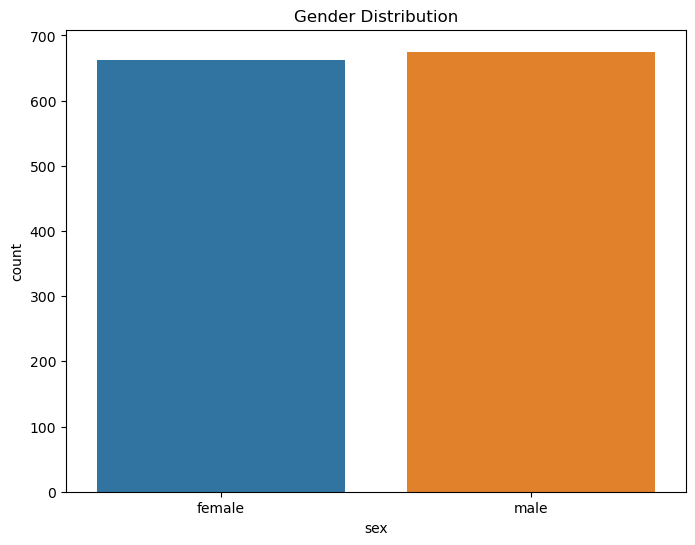

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex',hue = 'sex', data = df_clean)
plt.title('Gender Distribution')
plt.show()


The bar plot shows that the dataset has an approximately equal distribution of males and females. This balance is important for ensuring our analysis isn't biased towards a particular gender.


### Distribution of Smokers vs Non-Smokers in the dataset


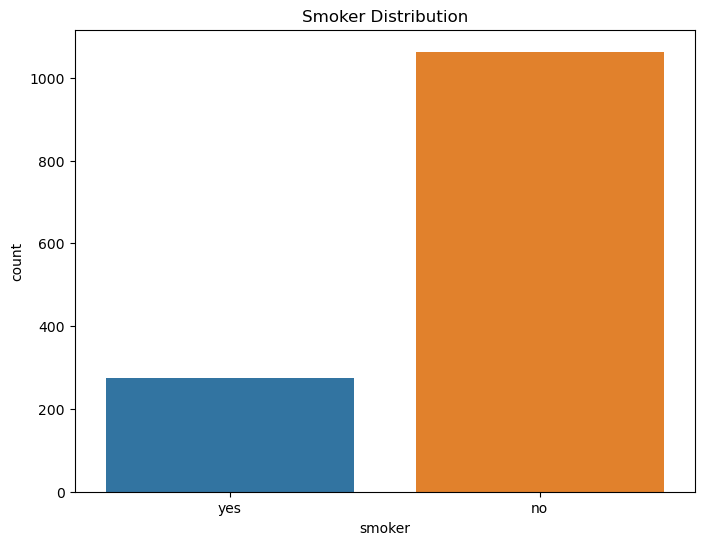

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker',hue = 'smoker', data=df_clean)
plt.title('Smoker Distribution')
plt.show()


The plot reveals that non-smokers significantly outnumber smokers in our dataset. This imbalance might have interesting implications for our analysis of insurance charges.


### Distribution of Region attribute in the dataset

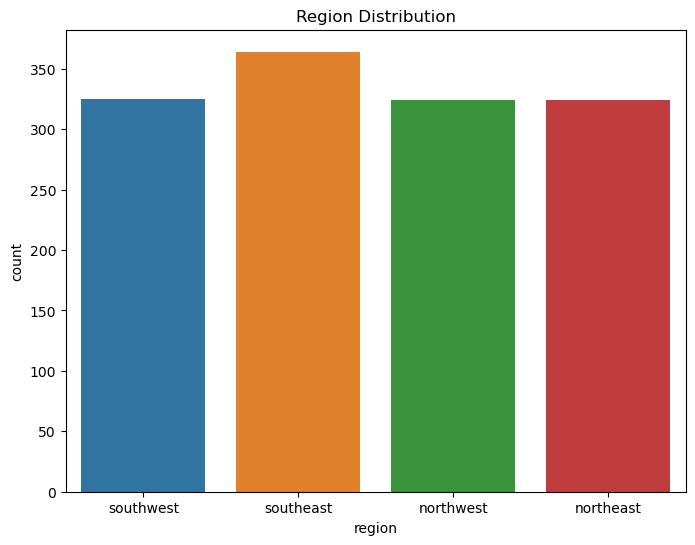

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='region',hue= 'region', data=df_clean)
plt.title('Region Distribution')
plt.show()

The bar chart indicates that the four regions (southwest, southeast, northwest, northeast) are fairly evenly represented in our dataset. This balance allows for meaningful comparisons across different geographical areas.

### Distribution of Children in the dataset


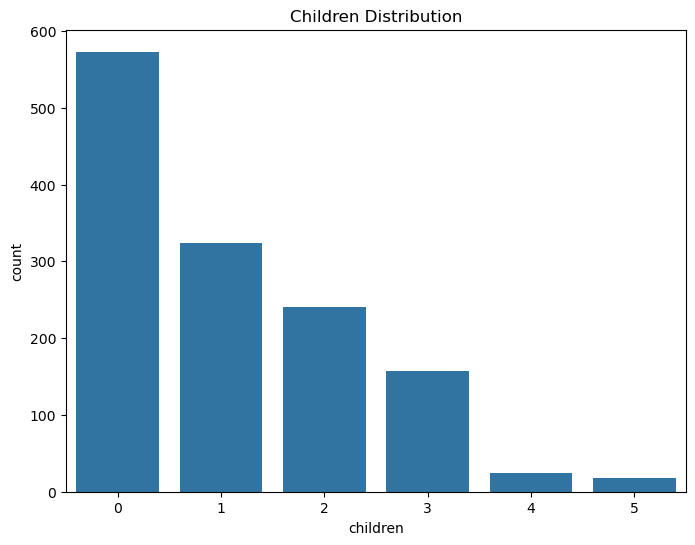

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='children', data=df_clean)
plt.title('Children Distribution')
plt.show()

The graph shows a clear trend, with a large number of people having no children,followed by a progressive reduction as the number of children grows, resulting in asignificant drop for those with four or five children.

### Distribution of Age in the dataset


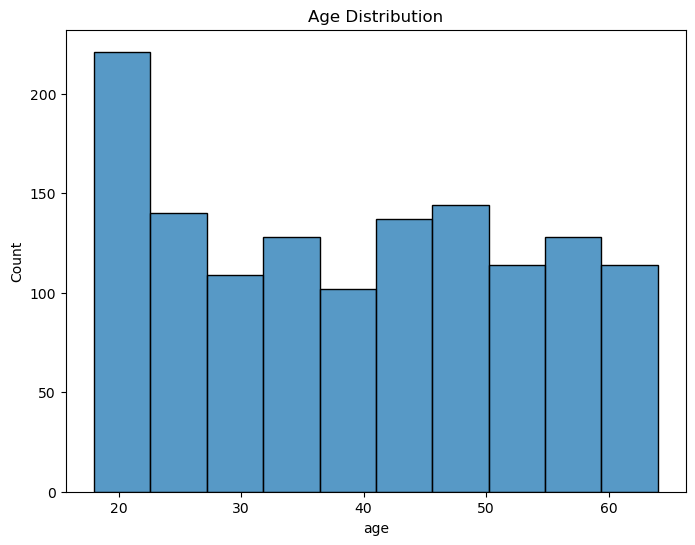

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='age', bins=10)
plt.title('Age Distribution')
plt.show()

Individuals across all age groups have been fairly represented in the dataset, withpeaks and troughs at extreme age groups.

### Distribution of medical charges in the dataset


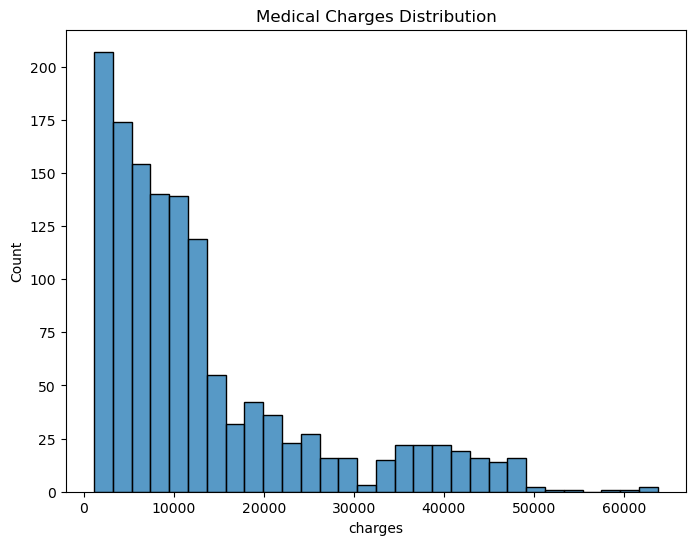

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='charges', bins=30)
plt.title('Medical Charges Distribution')
plt.show()

Most of the individuals in the dataset incur charges less than 20,000.

### BMI Distribution

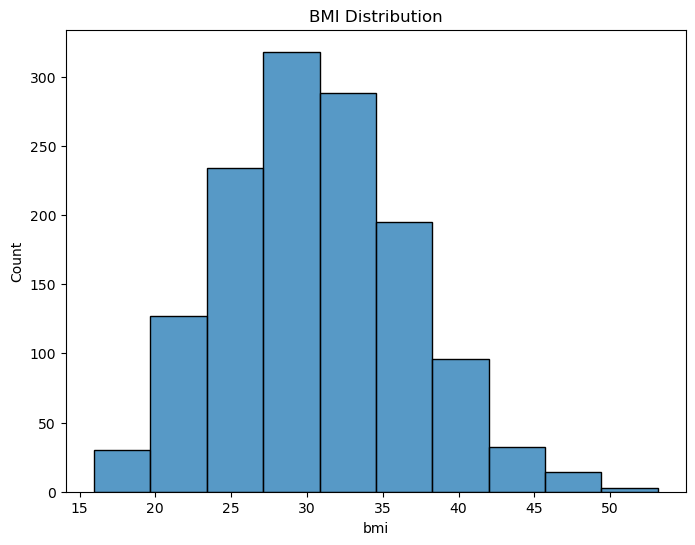

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='bmi', bins=10)
plt.title('BMI Distribution')
plt.show()

The graph is approximately normally distributed, However, in extreme scenario it can be considered slightly skewed towards the right side.
Let’s analyze it further.

### Analyzing if the BMI attribute is normally distributed using a boxplot

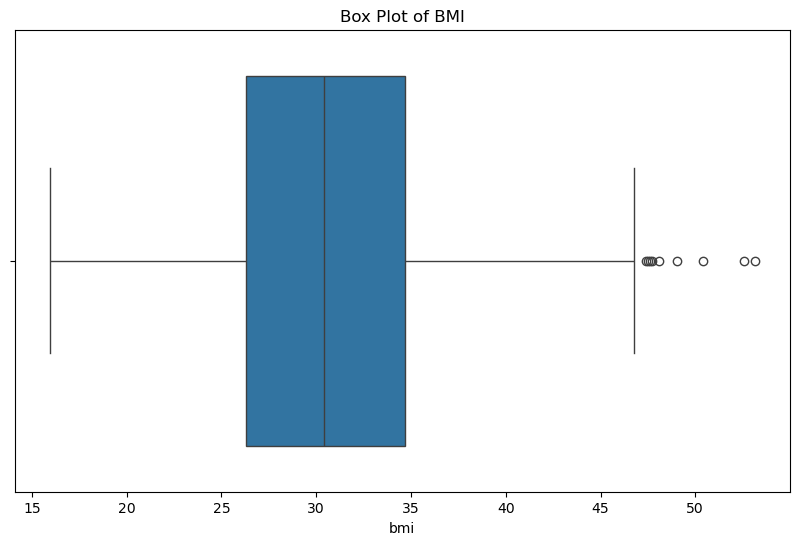

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['bmi'])
plt.title('Box Plot of BMI')
plt.show()

After removing the outliers, It is evident from the above Boxplot, that the BMI data is in fact Normally Distributed for all practical purposes.

### Compare medical charges based on gender and smoking status


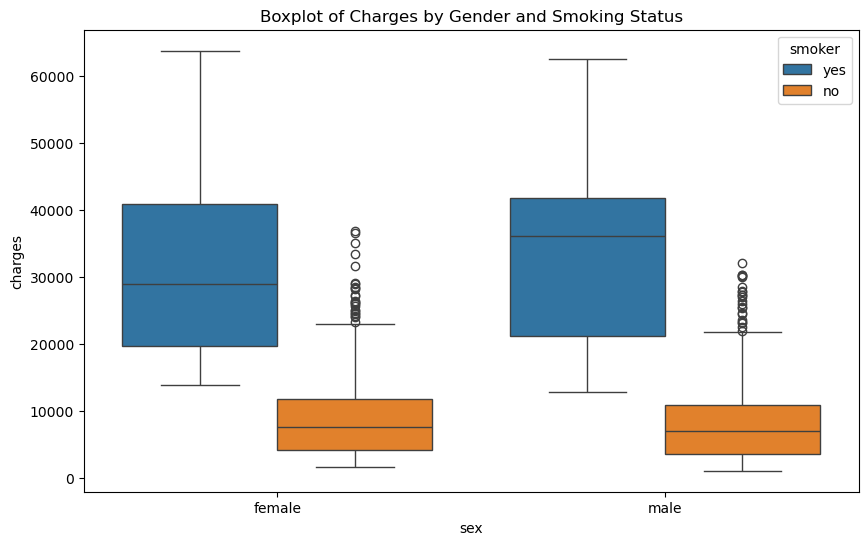

In [40]:
# Comparing medical charges based on gender and smoking status
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', hue='smoker', data=df_clean)
plt.title('Boxplot of Charges by Gender and Smoking Status')
plt.show()

It is evident from the above analysis that medical charges are gender neutral as both male and female non-smokers have a similar distribution of charges. Likewise, smokers from both genders have their medical bills onthe higher side.

### Comparing the medical charges of smokers with non-smokers


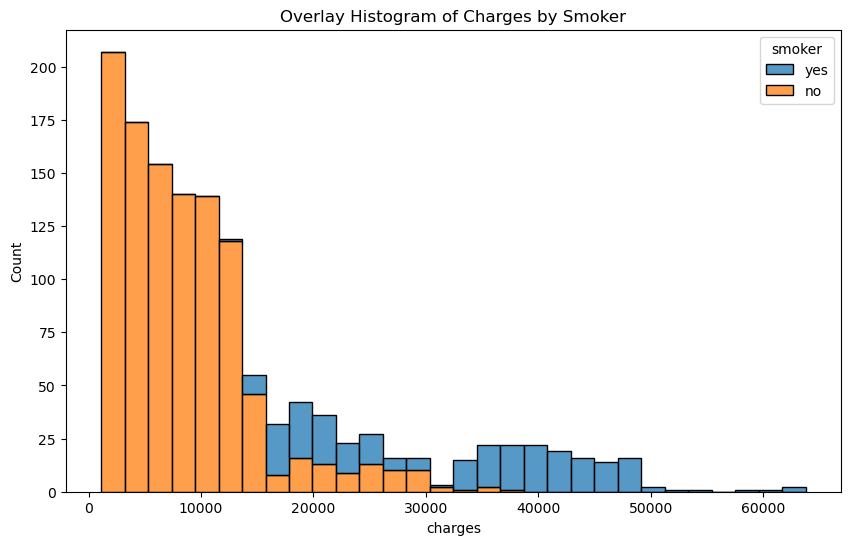

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='charges', hue='smoker', multiple='stack', bins=30)
plt.title('Overlay Histogram of Charges by Smoker')
plt.show()

It is clearly evident from the above graph that smokers tend to incur higher medicalbills compared to non-smokers. Hence, it can be inferred that smoking adverselyaffects an individuals health and translates to higher medical costs.

### Analyzing the relation between medical charges and age


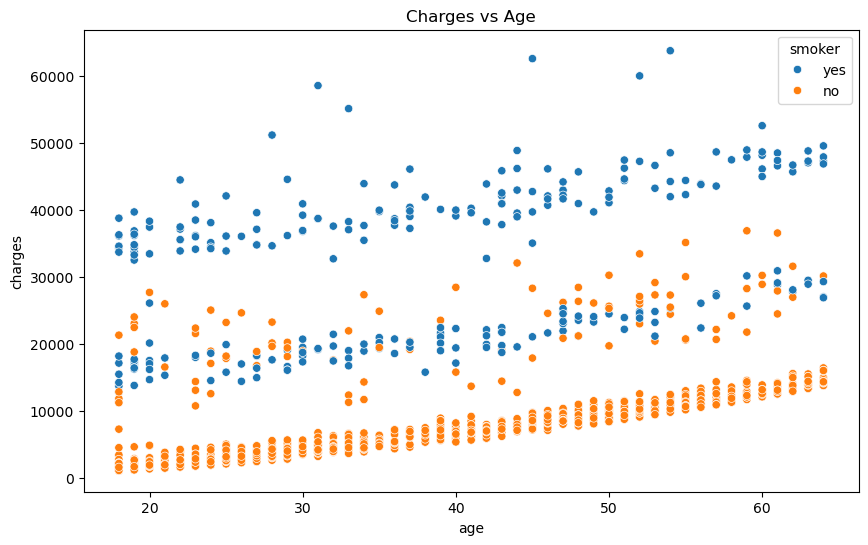

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df_clean)
plt.title('Charges vs Age')
plt.show()

Distinct trend lines can be observed upon plotting the age against charges. As the age increases, the medical charges also increases correspondingly. This is true forboth smokers and non-smokers as separate trend lines for both categories of peoplecan be observed.

### Analyzing the relation between medical charges and BMI


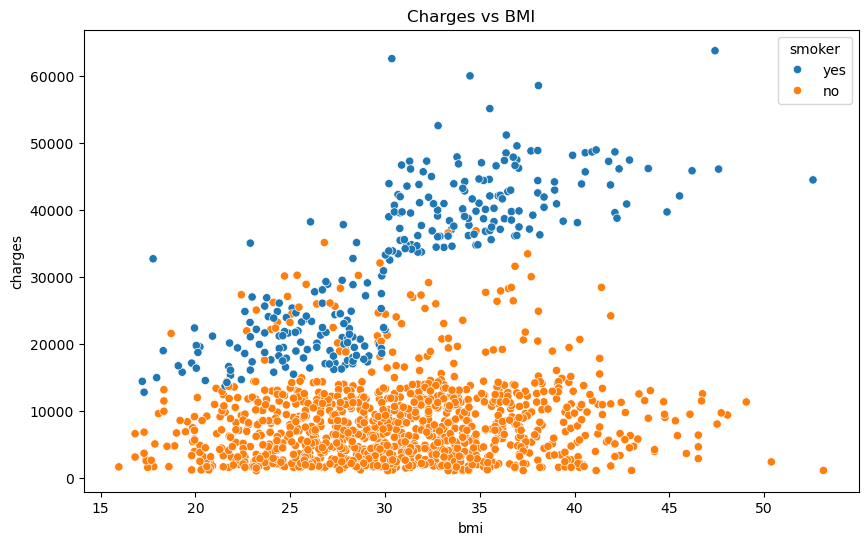

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df_clean)
plt.title('Charges vs BMI')
plt.show()

From the above analysis, it can be deduced that rising bmi coupled smoking habits,generally contribute to higher medical charges. If any of the two contributing factors is negative i.e. bmi is close to the healthy range (18 to 25) or the individual is non-smoker, it corresponds to lower medical charges.

In [51]:
# Comparing the variance of the medical charges of the smoking population with the non-smoking population
smokers_charges = df_clean[df_clean['smoker'] == 'yes']['charges']
non_smokers_charges = df_clean[df_clean['smoker'] == 'no']['charges']

f_statistic, p_value = stats.f_oneway(smokers_charges, non_smokers_charges)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Perform t-test
t_statistic, t_p_value = stats.ttest_ind(smokers_charges, non_smokers_charges, equal_var=False)
print("T-statistic:", t_statistic)
print("p-value:", t_p_value)

F-statistic: 2175.7368631272116
p-value: 1.4067220949358597e-282
T-statistic: 32.7423097372529
p-value: 6.261720774727631e-103


As P value is less than alpha we can reject null hypothesis, From F test we canconclude that there is a statistically significant difference between the variances of thetwo samples

Assuming,
Null Hypothesis (H0) : Mean charges for smokers is equal to Mean charges for non smokers
Alternative Hypothesis (HA) : Mean charges for smokers is not equal to Mean charges for non smokers

In [54]:
region_dummies = pd.get_dummies(df_clean['region'], drop_first=True)
df_clean = pd.concat([df_clean, region_dummies], axis=1)
df_clean = df_clean.drop('region', axis=1)

# Machine Learning Models

### We'll now apply various machine learning techniques to analyze and predict insurance charges based on the available features.

In [56]:
# Split the data into features (X) and target variable (y)
X = df_clean.drop('charges', axis=1)
y = df_clean['charges']

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [59]:
# Identify and encode categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['sex', 'region', 'smoker']  # Replace with your actual column names
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for inverse transformation if needed


# Define features (X) and target (y)
X = df.drop(['charges'], axis=1)  # Replace 'charges' with your target column
y = df['charges']  # Replace 'charges' with your target column

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [60]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 33635210.43117841
R-squared Score: 0.7833463107364538


Linear Regression Model has 78.33% of the variability in insurance charges, indicating good predictive power.

However, there is still about 21.67% of the variance that is not explained by the model, suggesting room for improvement.

The high MSE indicates that while the model captures overall trends, individual predictions may still have significant errors.

Overall, this model provides a useful starting point for predicting insurance charges, but there may be opportunities to improve its accuracy further.

In [62]:
# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

    feature    importance
4    smoker  23647.818096
3  children    425.091456
2       bmi    335.781491
5    region    271.284266
0       age    257.056264
1       sex     18.791457


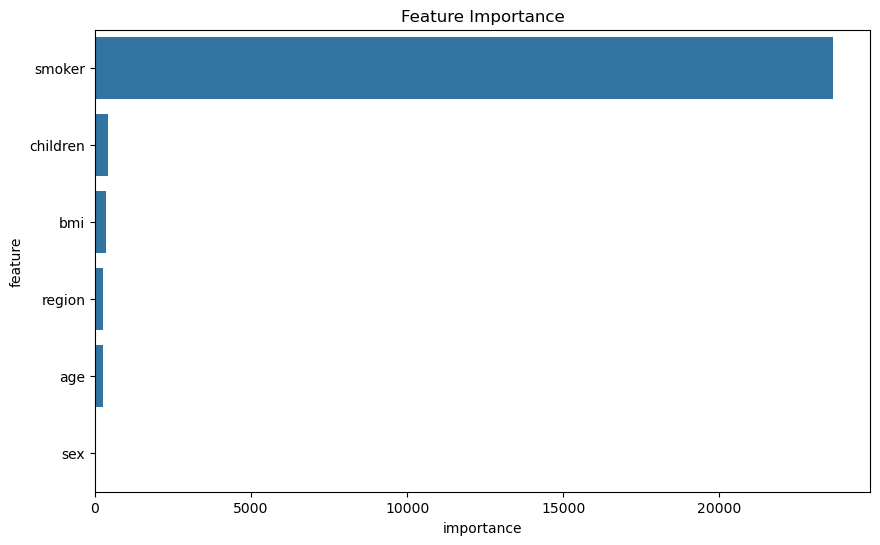

In [63]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

It seems like the smoker is the important feature followed by Children, bmi, and age according to this dataset.

   age  sex     bmi  children  smoker      charges  northwest  southeast  \
0   19    0  27.900         0       1  16884.92400      False      False   
1   18    1  33.770         1       0   1725.55230      False       True   
2   28    1  33.000         3       0   4449.46200      False       True   
3   33    1  22.705         0       0  21984.47061       True      False   
4   32    1  28.880         0       0   3866.85520       True      False   

   southwest  
0       True  
1      False  
2      False  
3      False  
4      False  


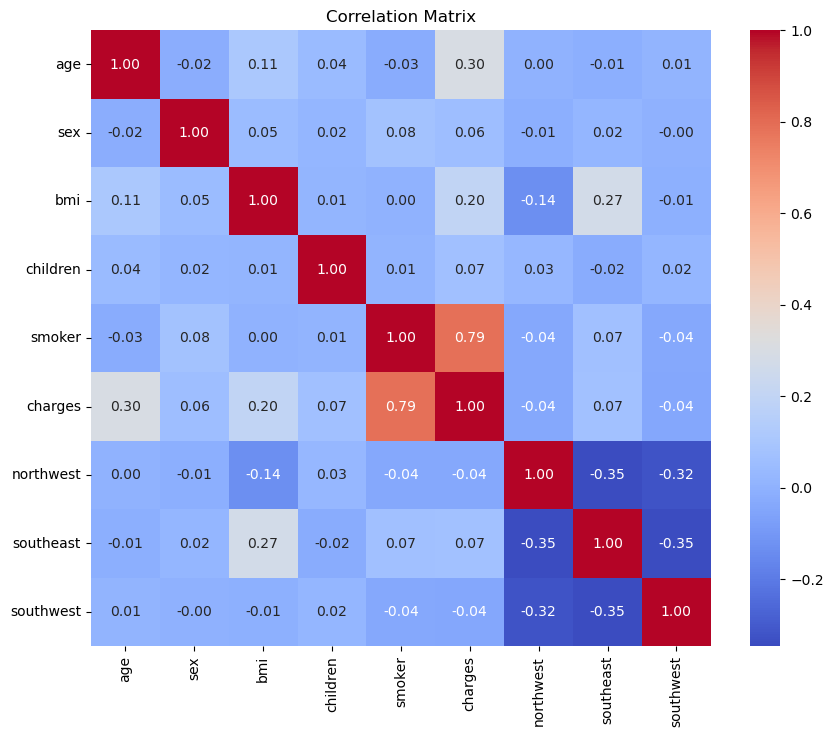

In [65]:
# Correct list of categorical columns
categorical_columns = ['sex', 'smoker']  # Updated based on your data

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Encode only the valid categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  # Save encoders if needed later for inverse transformation

# Verify encoding
print(df_clean.head())

# Create the correlation matrix
correlation_matrix = df_clean.corr()

# Visualize the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


The 'smoker' variable has the strongest positive correlation with charges.
'Age' also shows a positive correlation with charges.
'BMI' has a moderate positive correlation with charges.
The number of 'children' has a weak positive correlation with charges.

In [67]:
# Split the data
X = df_clean.drop('charges', axis=1)
y = df_clean['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [69]:
# Logistic Regression (assuming we create a binary target, e.g., high_charges)
df_clean['high_charges'] = (df_clean['charges'] > df_clean['charges'].median()).astype(int)
y_log = df_clean['high_charges']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train_log, y_train_log)

y_pred_log = log_model.predict(X_test_log)

print("Logistic Regression Accuracy:", accuracy_score(y_test_log, y_pred_log))
print(classification_report(y_test_log, y_pred_log))

print("\nFeature coefficients:")
for feature, coef in zip(X.columns, log_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Logistic Regression Accuracy: 0.9067164179104478
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       132
           1       0.89      0.93      0.91       136

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268


Feature coefficients:
age: 0.1464
sex: -0.2656
bmi: 0.0165
children: 0.0893
smoker: 6.1525
northwest: -0.1576
southeast: -0.5783
southwest: -0.4201


C:\Users\koyya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [71]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_log, y_train_log)

y_pred_dt = dt_model.predict(X_test_log)

print("Decision Tree Accuracy:", accuracy_score(y_test_log, y_pred_dt))
print(classification_report(y_test_log, y_pred_dt))

print("\nFeature coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")


Decision Tree Accuracy: 0.8768656716417911
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       132
           1       0.86      0.90      0.88       136

    accuracy                           0.88       268
   macro avg       0.88      0.88      0.88       268
weighted avg       0.88      0.88      0.88       268


Feature coefficients:
age: 257.0563
sex: -18.7915
bmi: 335.7815
children: 425.0915
smoker: 23647.8181
northwest: -271.2843


## Random Forest

In [73]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_log, y_train_log)
y_pred_rf = rf_model.predict(X_test_log)
print("Random Forest Accuracy:", accuracy_score(y_test_log, y_pred_rf))
print(classification_report(y_test_log, y_pred_rf))
print("\nFeature importance:")
for feature, importance in zip(X.columns, rf_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Random Forest Accuracy: 0.9328358208955224
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       132
           1       0.95      0.92      0.93       136

    accuracy                           0.93       268
   macro avg       0.93      0.93      0.93       268
weighted avg       0.93      0.93      0.93       268


Feature importance:
age: 0.4834
sex: 0.0152
bmi: 0.1475
children: 0.0469
smoker: 0.2817
northwest: 0.0075
southeast: 0.0100
southwest: 0.0078


In [74]:
print("Model Comparison:")
print("Linear Regression R-squared:", r2_score(y_test, y_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test_log, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test_log, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test_log, y_pred_rf))


Model Comparison:
Linear Regression R-squared: -0.7068449620792849
Logistic Regression Accuracy: 0.9067164179104478
Decision Tree Accuracy: 0.8768656716417911
Random Forest Accuracy: 0.9328358208955224


* The Random Forest model performs best overall, with highest accuracy and balanced precision/recall.
* There's a strong correlation between smoking status and charges, which could be explored further.

Upon looking at the feature Importance values of all the models it is evident that Insurance companies appear to rely heavily on age when determining charges, likely due to the increased health risks associated with aging.

Smoking is a major factor in insurance pricing, reflecting the well-known health risks associated with tobacco use.

BMI, which is often linked to overall health status, plays a significant role in determining insurance costs.

The number of children insured has a small but noticeable impact on charges, possibly reflecting family health plans.

Gender and geographical location seem to have minimal influence on insurance pricing in this model, suggesting a more standardized approach across these demographics.

### Recommendations for Future Research:

* Incorporating more detailed geographic data to analyze local trends in insurance costs.
* Considering of collecting more data on other lifestyle factors to improve predictive power.
* Including additional health-related factors such as pre-existing conditions or lifestyle choices beyond smoking.
* Conducting a longitudinal study to examine how insurance costs change over time for individuals.
* Exploring more advanced machine learning techniques, such as ensemble methods or deep learning, to potentially improve predictive accuracy.
* The models could be used to identify high-risk individuals for targeted smoking cessation programs.